In [43]:
using Plots
using Random
using Colors, ColorSchemes
using Dates
using DataStructures

In [44]:
EventT = Tuple{Int, Int}

function grow(colonies,space,t,x,y,event_queue,beta)
    function add_event(x,y)
        dt = exp(space[x,y]*beta)+t  # randomly pick future time for attempt at colonisation
        event_queue[(x,y)] = dt
    end
    
    if colonies[x,y]<0 # if edge then stop
        return false
    end
    if colonies[x,y]==0 # if colonie space is empty 
        colonies[x,y]=1 # colonise it
        # set times for this new colony to colonise neighbours
        add_event(x+1,y)
        add_event(x-1,y)
        add_event(x,y+1)
        add_event(x,y-1)       
    end
    return true
end;



In [45]:
start = now()#Timer
#Set size of space
g_size = 1002;

#Initialize colonies space as empty with zero and edge of colonies space with -1
colonies = fill(Int8(-1),g_size,g_size)
colonies[2:end-1,2:end-1] .= 0

#Initialise astronomical space with random difficulty of colonisation
space=rand(Float64, (g_size, g_size))
    
# Set an event_queue each attempt of colonisation is given a random time tis queue will try the earliest first
event_queue = PriorityQueue{EventT, Float64}()

#Galeris's technical difficulty
beta = 25

g_time = 0
# Set seed colony in centre of our simulation
grow(colonies,space,g_time,div(g_size,2),div(g_size,2),event_queue,beta)

# Try all the attempts of colonisation until edge is reached
flag = true
while(flag)
    # get the first event of the queue
    (x, y), g_time = peek(event_queue) 
    dequeue!(event_queue)
    # Try the colonisation attempt
    flag = grow(colonies, space, g_time, x, y, event_queue, beta)
end
stop =now();




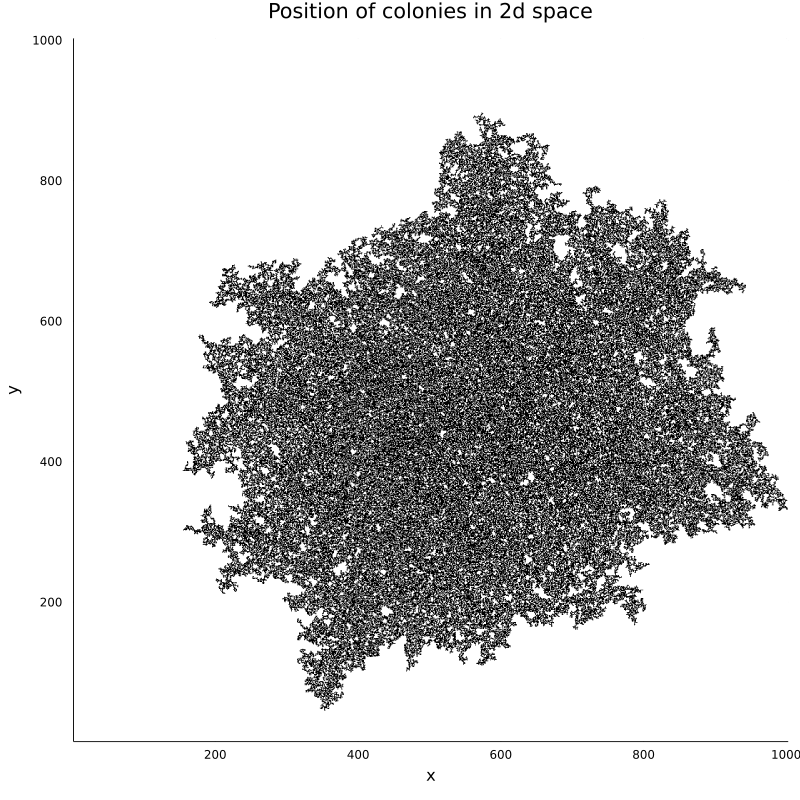

In [46]:

mycmap = ColorScheme([RGB{Float64}(1, 1,1),RGB{Float64}(0, 0,0)])

heatmap(2:g_size,
    2:g_size, colonies[2:end-1,2:end-1],
    c=cgrad(mycmap),
    xlabel="x", ylabel="y",
    title="Position of colonies in 2d space",
    size=(800,800),
    legend = :none)

In [47]:
run_time = (stop-start).value/1000

0.85

In [48]:
sum(colonies[2:end-1,2:end-1])*1.0

255084.0

In [49]:
g_time*1000.0

9.053896434497989e10